In [ ]:
import os
import time
import requests
import sys

def retrieve_html():
    for year in range(2018, 2025):
        for month in range(1, 13):
            if month < 10:
                url = 'http://en.tutiempo.net/climate/0{}-{}/ws-421820.html'.format(month, year)
            else:
                url = 'http://en.tutiempo.net/climate/{}-{}/ws-421820.html'.format(month, year)

            try:
                response = requests.get(url)
                response.raise_for_status()
                text_utf = response.text.encode('utf-8')

                folder_path = "Data/Html_Data/{}".format(year)
                os.makedirs(folder_path, exist_ok=True)

                with open("{}/{}.html".format(folder_path, month), "wb") as output:
                    output.write(text_utf)

                print(f"✅ Saved: {folder_path}/{month}.html")
            except Exception as e:
                print(f" Failed: {url} — {e}")

    sys.stdout.flush()

# Run the function
start_time = time.time()
retrieve_html()
stop_time = time.time()
print("Time taken: {:.2f} seconds".format(stop_time - start_time))


✅ Saved: Data/Html_Data/2018/1.html
✅ Saved: Data/Html_Data/2018/2.html
✅ Saved: Data/Html_Data/2018/3.html
✅ Saved: Data/Html_Data/2018/4.html
✅ Saved: Data/Html_Data/2018/5.html
✅ Saved: Data/Html_Data/2018/6.html
✅ Saved: Data/Html_Data/2018/7.html
✅ Saved: Data/Html_Data/2018/8.html
✅ Saved: Data/Html_Data/2018/9.html
✅ Saved: Data/Html_Data/2018/10.html
✅ Saved: Data/Html_Data/2018/11.html
✅ Saved: Data/Html_Data/2018/12.html
✅ Saved: Data/Html_Data/2019/1.html
✅ Saved: Data/Html_Data/2019/2.html
✅ Saved: Data/Html_Data/2019/3.html
✅ Saved: Data/Html_Data/2019/4.html
✅ Saved: Data/Html_Data/2019/5.html
✅ Saved: Data/Html_Data/2019/6.html
✅ Saved: Data/Html_Data/2019/7.html
✅ Saved: Data/Html_Data/2019/8.html
✅ Saved: Data/Html_Data/2019/9.html
✅ Saved: Data/Html_Data/2019/10.html
✅ Saved: Data/Html_Data/2019/11.html
✅ Saved: Data/Html_Data/2019/12.html
✅ Saved: Data/Html_Data/2020/1.html
✅ Saved: Data/Html_Data/2020/2.html
✅ Saved: Data/Html_Data/2020/3.html
✅ Saved: Data/Html_Dat

In [ ]:
import shutil
shutil.make_archive("html_data_all", 'zip', "Data/Html_Data")

from google.colab import files
files.download("html_data_all.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import os

final_weather = []

for year in range(2018, 2025):
    for month in range(1, 13):
        try:
            file_path = f"Data/Html_Data/{year}/{month}.html"
            with open(file_path, "rb") as file:
                soup = BeautifulSoup(file, "html.parser")

            table = soup.find("table", attrs={"class": "medias mensuales numspan"})
            if not table:
                continue
            rows = table.find_all("tr")[1:]

            for row in rows:
                cols = row.find_all("td")
                if len(cols) >= 8:
                    day = cols[0].text.strip()
                    if day.isdigit():
                        temp = cols[1].text.strip()
                        dew = cols[2].text.strip()
                        humidity = cols[3].text.strip()
                        wind = cols[7].text.strip()

                        final_weather.append([f"{year}-{month:02d}-{int(day):02d}", temp, dew, humidity, wind])
        except:
            pass


df_weather = pd.DataFrame(final_weather, columns=["Date", "Temp", "Dew", "Humidity", "Wind"])
df_weather.to_csv("weather_2018_2024.csv", index=False)
print("✅ weather_2018_2024.csv created")


✅ weather_2018_2024.csv created


In [ ]:
import pandas as pd


weather_df = pd.read_csv("weather_2018_2024.csv")
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

aqi_df = pd.read_csv("Hyderabad_AQI_Dataset.csv")
aqi_df['Date'] = pd.to_datetime(aqi_df['Date'])

merged_df = pd.merge(weather_df, aqi_df, on='Date', how='inner')

merged_df.to_csv("merged_aqi_weather.csv", index=False)
print("✅ Merged dataset saved as merged_aqi_weather.csv")


✅ Merged dataset saved as merged_aqi_weather.csv


/tmp/ipython-input-5-1912738232.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  aqi_df['Date'] = pd.to_datetime(aqi_df['Date'])


In [ ]:
import pandas as pd

df = pd.read_csv("merged_aqi_weather.csv")


print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\nFirst 5 rows:\n")
print(df.head())

if df.empty:
    print("⚠️ The dataset is EMPTY.")
else:
    print("✅ The dataset has data and is ready to use.")


Rows: 2556, Columns: 26

First 5 rows:

         Date  Temp   Dew Humidity Wind       City  AQI  PM2.5    PM10  \
0  2018-01-01  12.2  23.9      5.7  0.3  Hyderabad  119  65.45  128.52   
1  2018-01-02  11.8  20.1      8.4  0.3  Hyderabad  117  64.35  126.36   
2  2018-01-03  11.3  18.2      6.7  0.6  Hyderabad  121  66.55  130.68   
3  2018-01-04  12.2  20.2        5  0.6  Hyderabad   94  51.70  101.52   
4  2018-01-05  11.6  17.6      7.6  0.6  Hyderabad  117  64.35  126.36   

      NO2  ...  Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  \
0   98.77  ...          NaN          NaN          NaN          NaN   
1   97.11  ...          NaN          NaN          NaN          NaN   
2  100.43  ...          NaN          NaN          NaN          NaN   
3   78.02  ...          NaN          NaN          NaN          NaN   
4   97.11  ...          NaN          NaN          NaN          NaN   

   Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  \
0          NaN          

In [ ]:

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df = df.drop(columns=['City'], errors='ignore')

df.to_csv("merged_aqi_weather_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as merged_aqi_weather_cleaned.csv")


✅ Cleaned dataset saved as merged_aqi_weather_cleaned.csv


In [ ]:
import os
from bs4 import BeautifulSoup
import pandas as pd

base_path = "Data/Html_Data"
all_data = []

for year in range(2018, 2025):
    for month in range(1, 13):
        file_path = f"{base_path}/{year}/{month}.html"
        if not os.path.exists(file_path):
            continue

        with open(file_path, 'rb') as f:
            soup = BeautifulSoup(f, 'html.parser')

        table = soup.find("table", attrs={"class": "medias mensuales numspan"})
        if not table:
            continue

        rows = table.find_all("tr")[1:]  # Skip header

        for row in rows:
            cols = row.find_all("td")
            if len(cols) >= 10:
                try:
                    day = cols[0].text.strip()
                    date = f"{year}-{month:02d}-{int(day):02d}"
                    temp = cols[1].text.strip()
                    dew = cols[2].text.strip()
                    humidity = cols[3].text.strip()
                    wind = cols[4].text.strip()
                    pressure = cols[5].text.strip()
                    rainfall = cols[6].text.strip()
                    visibility = cols[7].text.strip()
                    cloud = cols[8].text.strip()

                    all_data.append([date, pressure, rainfall, visibility, cloud])
                except:
                    continue

columns = ['Date', 'Pressure', 'Rainfall', 'Visibility', 'Cloud']
enhanced_df = pd.DataFrame(all_data, columns=columns)

enhanced_df.to_csv("enhanced_weather.csv", index=False)
print("✅ enhanced_weather.csv saved.")

from google.colab import files
files.download("enhanced_weather.csv")


✅ enhanced_weather.csv saved.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

aqi_df = pd.read_csv("merged_aqi_weather.csv")
enhanced_df = pd.read_csv("enhanced_weather.csv")

aqi_df['Date'] = pd.to_datetime(aqi_df['Date'])
enhanced_df['Date'] = pd.to_datetime(enhanced_df['Date'])


merged_full = pd.merge(aqi_df, enhanced_df, on='Date', how='inner')


merged_full.to_csv("merged_full_aqi_weather.csv", index=False)
print("✅ Merged dataset saved as merged_full_aqi_weather.csv")


from google.colab import files
files.download("merged_full_aqi_weather.csv")


✅ Merged dataset saved as merged_full_aqi_weather.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
df = pd.read_csv("merged_full_aqi_weather.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.to_csv("merged_full_cleaned.csv", index=False)
print("✅ Cleaned file saved as merged_full_cleaned.csv")


✅ Cleaned file saved as merged_full_cleaned.csv


In [ ]:
from google.colab import files
files.download("merged_full_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                                Date          AQI        PM2.5         PM10  \
count                           2556  2556.000000  2556.000000  2556.000000   
mean   2021-07-02 04:35:29.577464832    85.401408    46.970775    92.233521   
min              2018-01-01 00:00:00    19.000000    10.450000    20.520000   
25%              2019-10-01 18:00:00    58.000000    31.900000    62.640000   
50%              2021-07-02 12:00:00    82.000000    45.100000    88.560000   
75%              2023-04-02 06:00:00   109.000000    59.950000   117.720000   
max              2024-12-31 00:00:00   193.000000   106.150000   208.440000   
std                              NaN    34.039957    18.721976    36.763153   

               NO2          SO2           CO           O3  
count  2556.000000  2556.000000  2556.000000  2556.000000  
mean     70.883169    97.357606     0.897093    81.131338  
min      15.770000    21.660000     0.200000    18.050000  
25%      48.140000    66.120000     0.610000    

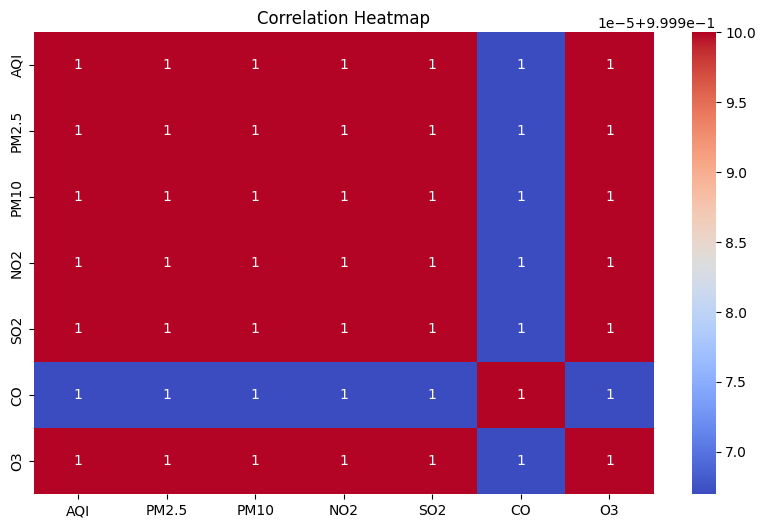

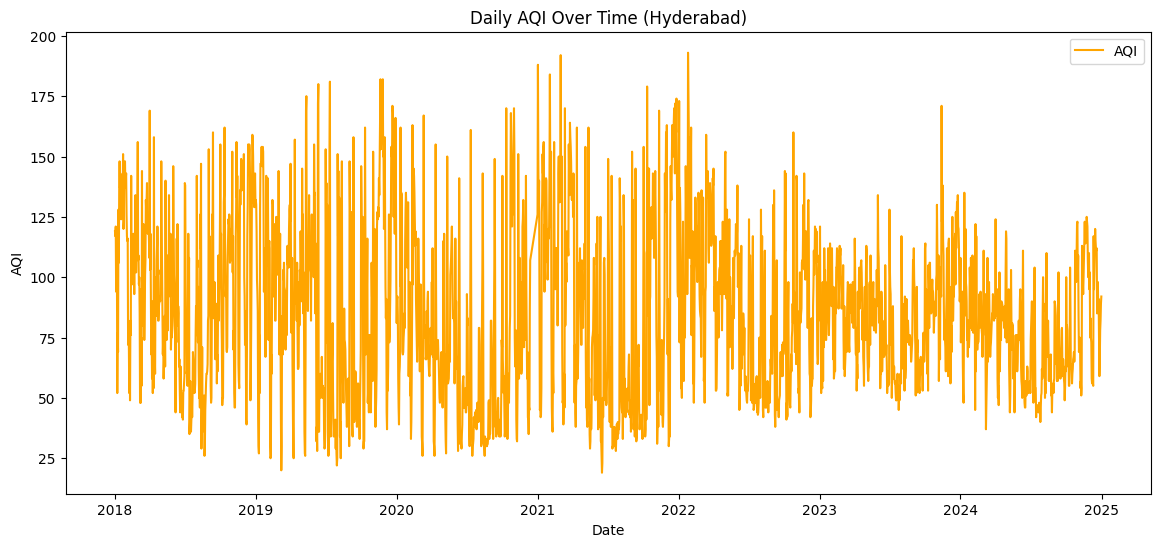

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("merged_full_cleaned.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Basic summary
print(df.describe())

# Null check
print(df.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# AQI trends over time
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['AQI'], label="AQI", color='orange')
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("Daily AQI Over Time (Hyderabad)")
plt.legend()
plt.show()


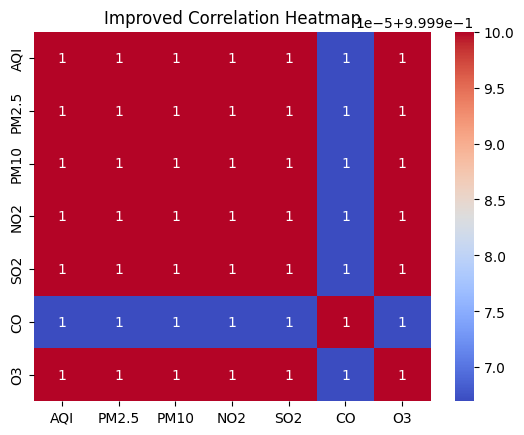

In [ ]:
# Better correlation matrix
corr = df[['AQI', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']].corr(method='pearson')
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Improved Correlation Heatmap")
plt.show()


✅ R² Score: 0.9999957722748226
✅ RMSE: 0.06893299509306165


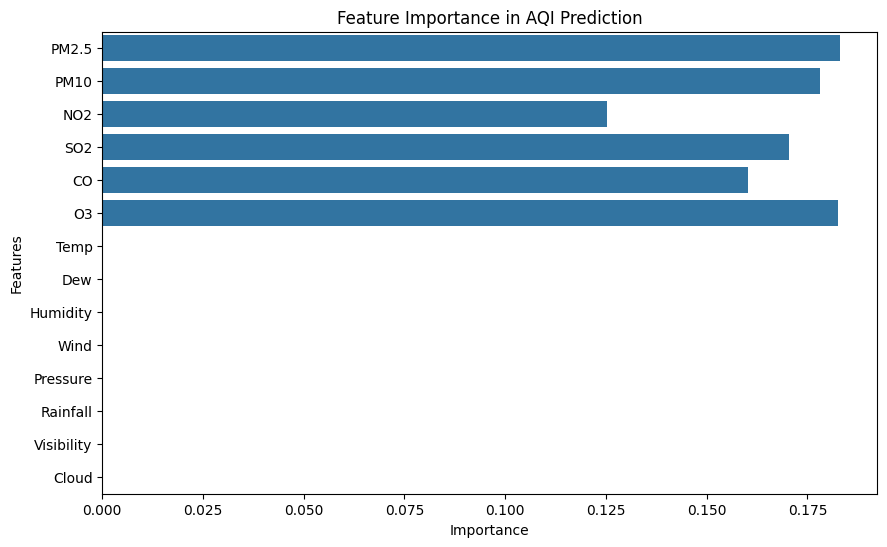

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("merged_full_cleaned.csv")

# Select relevant features
features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3',
            'Temp', 'Dew', 'Humidity', 'Wind', 'Pressure', 'Rainfall', 'Visibility', 'Cloud']
X = df[features]
y = df['AQI']

# Convert all features to numeric (non-numeric values will become NaN)
X = X.apply(pd.to_numeric, errors='coerce')

# Fill NaN with column means
X = X.fillna(X.mean())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("✅ R² Score:", r2_score(y_test, y_pred))
print("✅ RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Plot feature importance
importance = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance in AQI Prediction")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


✅ R² Score: 0.9999885559082031
✅ RMSE: 0.11330734149765477


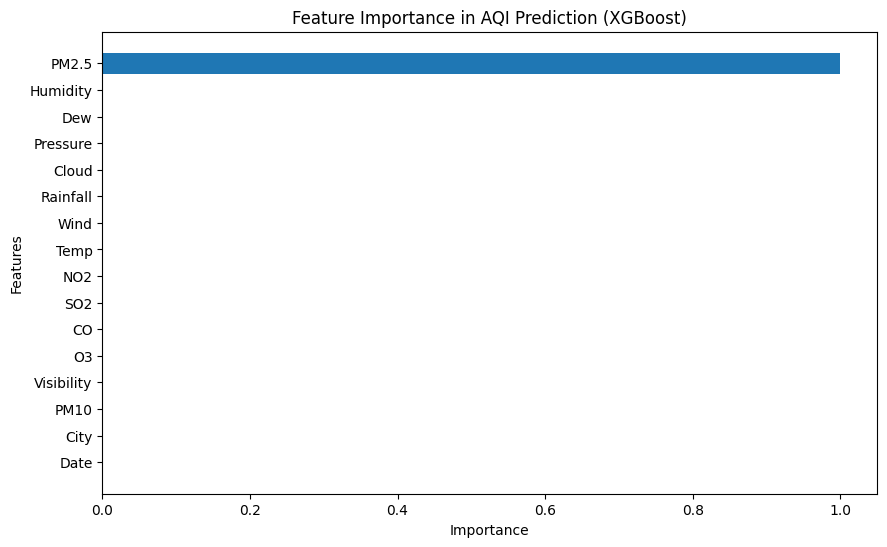

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Replace 'df' with your actual DataFrame
X = df.drop(columns=['AQI'])
y = df['AQI']
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("✅ R² Score:", r2)
print("✅ RMSE:", rmse)

plt.figure(figsize=(10, 6))
importances = model.feature_importances_
indices = np.argsort(importances)
plt.barh(X.columns[indices], importances[indices])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance in AQI Prediction (XGBoost)")
plt.show()
